# <h1> <font color="teal"> Importing Libraries : </font> </h1>

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msn
#from wordcloud import WordCloud
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from imblearn.under_sampling import RandomUnderSampler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# <h1> <font color="teal"> Importing Datasets : </font> </h1>

In [2]:
data_revenue = pd.read_csv("NSE_data.csv")

In [3]:
data_revenue.head()

Date  Code                     Name 12m Low 12m High Day Low Day High  \
0  3-Jan-22  EGAD              Eaagads Ltd      10       15    13.5     13.8   
1  3-Jan-22  KUKZ               Kakuzi Plc     355      427     385      385   
2  3-Jan-22  KAPC  Kapchorua Tea Kenya Plc      80      101    99.5     99.5   
3  3-Jan-22  LIMT           Limuru Tea Plc     260      360     320      320   
4  3-Jan-22  SASN               Sasini Plc   16.75     22.6    18.7     18.7   

  Day Price Previous Change Change% Volume Adjusted Price  
0      13.5     13.5      -       -  4,000              -  
1       385      385      -       -      -              -  
2      99.5     95.5      4   4.19%    100              -  
3       320      320      -       -      -              -  
4      18.7     18.7      -       -      -              -

In [4]:
# Drop the columns that you don't want to include and assign the result to a new variable called selected_data
selected_data = data_revenue.drop(["Code", "Change%", "Adjusted Price"], axis=1)

In [5]:
selected_data.head()

Date                     Name 12m Low 12m High Day Low Day High  \
0  3-Jan-22              Eaagads Ltd      10       15    13.5     13.8   
1  3-Jan-22               Kakuzi Plc     355      427     385      385   
2  3-Jan-22  Kapchorua Tea Kenya Plc      80      101    99.5     99.5   
3  3-Jan-22           Limuru Tea Plc     260      360     320      320   
4  3-Jan-22               Sasini Plc   16.75     22.6    18.7     18.7   

  Day Price Previous Change Volume  
0      13.5     13.5      -  4,000  
1       385      385      -      -  
2      99.5     95.5      4    100  
3       320      320      -      -  
4      18.7     18.7      -      -

# <h1> <font color="teal"> Creating A Binary Label : </font> </h1>

Where 1 indicates that 'Day Price' is going high, and 0 indicates that 'Day Price' is going low compared to the previous day's price.

In [6]:
# Define a binary label: 1 for 'Day Price' going high, 0 for 'Day Price' going low
selected_data['Price Increase'] = np.where(selected_data['Day Price'] > selected_data['Previous'], 1, 0)

In [7]:
selected_data.head()

Date                     Name 12m Low 12m High Day Low Day High  \
0  3-Jan-22              Eaagads Ltd      10       15    13.5     13.8   
1  3-Jan-22               Kakuzi Plc     355      427     385      385   
2  3-Jan-22  Kapchorua Tea Kenya Plc      80      101    99.5     99.5   
3  3-Jan-22           Limuru Tea Plc     260      360     320      320   
4  3-Jan-22               Sasini Plc   16.75     22.6    18.7     18.7   

  Day Price Previous Change Volume  Price Increase  
0      13.5     13.5      -  4,000               0  
1       385      385      -      -               0  
2      99.5     95.5      4    100               1  
3       320      320      -      -               0  
4      18.7     18.7      -      -               0

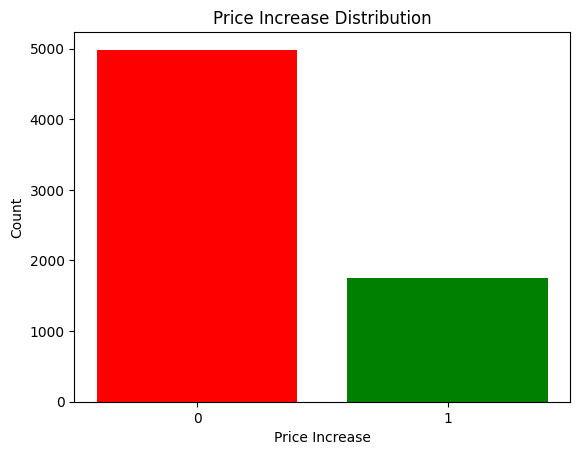

In [9]:
import matplotlib.pyplot as plt
# Count the number of 0s and 1s in the 'Price Increase' column
counts = selected_data['Price Increase'].value_counts()
# Assign a color to each value (0 or 1)
colors = ['red' if x == 0 else 'green' for x in counts.index]
# Plot the counts as a bar chart with the assigned colors
plt.bar(counts.index, counts.values, color=colors)
# Set the x-axis labels to 0 and 1
plt.xticks(counts.index, ['0', '1'])
# Set the title and axis labels
plt.title('Price Increase Distribution')
plt.xlabel('Price Increase')
plt.ylabel('Count')
# Show the plot
plt.show()

# <h1> <font color="teal"> Transformation : </font> </h1>

In [10]:
# Define a list of column names that you want to include
columns_to_include = ["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous","Change", "Volume"]

# Loop over the column names and apply the same operations to each column
for column in columns_to_include:
  # Replace commas with empty strings
  selected_data[column] = selected_data[column].str.replace(",", "")
  # Replace dashes with np.nan
  selected_data[column] = selected_data[column].replace("-", np.nan)
  # Convert the values to numeric and handle errors
  selected_data[column] = pd.to_numeric(selected_data[column], errors="coerce")

In [11]:
selected_data.sample(5)

Date                        Name  12m Low  12m High  Day Low  \
1780   8-Feb-22  Stanlib Fahari Income-REIT      5.5      7.48     6.40   
5000  20-Apr-22             Home Afrika Ltd      0.3      0.47     0.30   
2120  16-Feb-22                BK Group Plc     24.3     40.00    29.30   
969   21-Jan-22        Jubilee Holdings Ltd    248.0    392.00   307.00   
804   19-Jan-22                HF Group Ltd      2.8      5.20     3.55   

      Day High  Day Price  Previous  Change    Volume  Price Increase  
1780      6.50       6.46      6.50   -0.04    4600.0               0  
5000      0.35       0.32      0.33   -0.01  191100.0               0  
2120     30.00      29.85     29.00    0.85    5100.0               1  
969     310.00     309.75    310.00   -0.25     900.0               0  
804       3.65       3.59      3.59     NaN   26300.0               0

# <h1> <font color="teal"> Handling missing values : </font> </h1>

# <h3> <font color="#A19104"> Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature. : </font> </h3>

In [12]:
# Impute the missing values in Volume, Change with the median of each variable
def impute_median(series):
    return series.fillna(series.median())
selected_data[['Volume', 'Change']] = selected_data[['Volume', 'Change']].apply(impute_median)

In [13]:
selected_data.sample(5)

Date                        Name  12m Low  12m High  Day Low  \
5688  10-May-22                HF Group Ltd     2.80      5.20     3.00   
6410  25-May-22                BK Group Plc    24.30     40.00    31.05   
1865  10-Feb-22        Stanbic Holdings Plc    78.00    106.00    87.50   
3166   9-Mar-22  Stanlib Fahari Income-REIT     5.50      7.48     6.10   
2872   3-Mar-22      Crown Paints Kenya Plc    19.05     42.80    36.00   

      Day High  Day Price  Previous  Change   Volume  Price Increase  
5688      3.09       3.06      3.09   -0.03    300.0               0  
6410     31.05      31.05     30.00    1.05    100.0               1  
1865     95.00      94.75     94.00    0.75   5100.0               1  
3166      6.10       6.10      6.14   -0.04    700.0               0  
2872     36.00      36.00     36.00   -0.01  53500.0               0

# <h1> <font color="teal"> EDA Before Preprocessing : </font> </h1>

# <h3> <font color="#A19104"> Getting Description of the data set : </font> </h3>

In [14]:
selected_data.describe()

12m Low     12m High      Day Low     Day High    Day Price  \
count  6732.000000  6732.000000  6732.000000  6732.000000  6732.000000   
mean     86.688598   105.925501    96.248228    96.686641    96.440997   
std     286.829071   324.290414   309.676291   309.764709   309.715686   
min       0.170000     0.270000     0.170000     0.180000     0.170000   
25%       3.400000     4.600000     3.830000     3.860000     3.830000   
50%       9.210000    13.650000    10.975000    11.000000    11.000000   
75%      33.000000    45.250000    37.000000    37.762500    37.462500   
max    1780.000000  2135.000000  2135.000000  2135.000000  2135.000000   

          Previous       Change        Volume  Price Increase  
count  6732.000000  6732.000000  6.732000e+03     6732.000000  
mean     96.413639     0.022941  1.912565e+05        0.259507  
std     309.482751     3.074186  1.097252e+06        0.438397  
min       0.170000   -40.000000  1.000000e+02        0.000000  
25%       3.830000    -0.030000  3.800000e+03        0.000000  
50%      11.000000    -0.010000  1.080000e+04        0.000000  
75%      37.462500     0.010000  2.682500e+04        1.000000  
max    2135.000000   195.000000  2.214110e+07        1.000000

# <h3> <font color="#A19104"> Getting Data-types of the data set : </font> </h3>

In [13]:
selected_data.dtypes

Date               object
Name               object
12m Low           float64
12m High          float64
Day Low           float64
Day High          float64
Day Price         float64
Previous          float64
Change            float64
Volume            float64
Price Increase      int32
dtype: object

# <h3> <font color="#A19104"> Checking Null-values of the data set : </font> </h3>

In [14]:
selected_data.isnull().sum()

Date              0
Name              0
12m Low           0
12m High          0
Day Low           0
Day High          0
Day Price         0
Previous          0
Change            0
Volume            0
Price Increase    0
dtype: int64

# <h3> <font color="#A19104"> Getting Information about the data set : </font> </h3>

In [15]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6732 non-null   object 
 1   Name            6732 non-null   object 
 2   12m Low         6732 non-null   float64
 3   12m High        6732 non-null   float64
 4   Day Low         6732 non-null   float64
 5   Day High        6732 non-null   float64
 6   Day Price       6732 non-null   float64
 7   Previous        6732 non-null   float64
 8   Change          6732 non-null   float64
 9   Volume          6732 non-null   float64
 10  Price Increase  6732 non-null   int32  
dtypes: float64(8), int32(1), object(2)
memory usage: 552.4+ KB


# <h3> <font color="#A19104"> Getting duplicate values in the data set : </font> </h3>

In [16]:
# check Is there any duplicate value in the dataset
selected_data.duplicated().sum()

0

# <h3> <font color="#A19104"> Getting number of Unique values in the data set : </font> </h3>

In [17]:
selected_data.nunique(axis=0)

Date               102
Name                66
12m Low            148
12m High            87
Day Low           1159
Day High          1111
Day Price         1356
Previous          1354
Change             266
Volume            1576
Price Increase       2
dtype: int64

# <h3> <font color="#A19104">Printing the Shape of the data set : </font> </h3>

In [18]:
print(selected_data.shape)

(6732, 11)


# <h3> <font color="#A19104">Checking distribution  of the data set to identify outliers : </font> </h3>

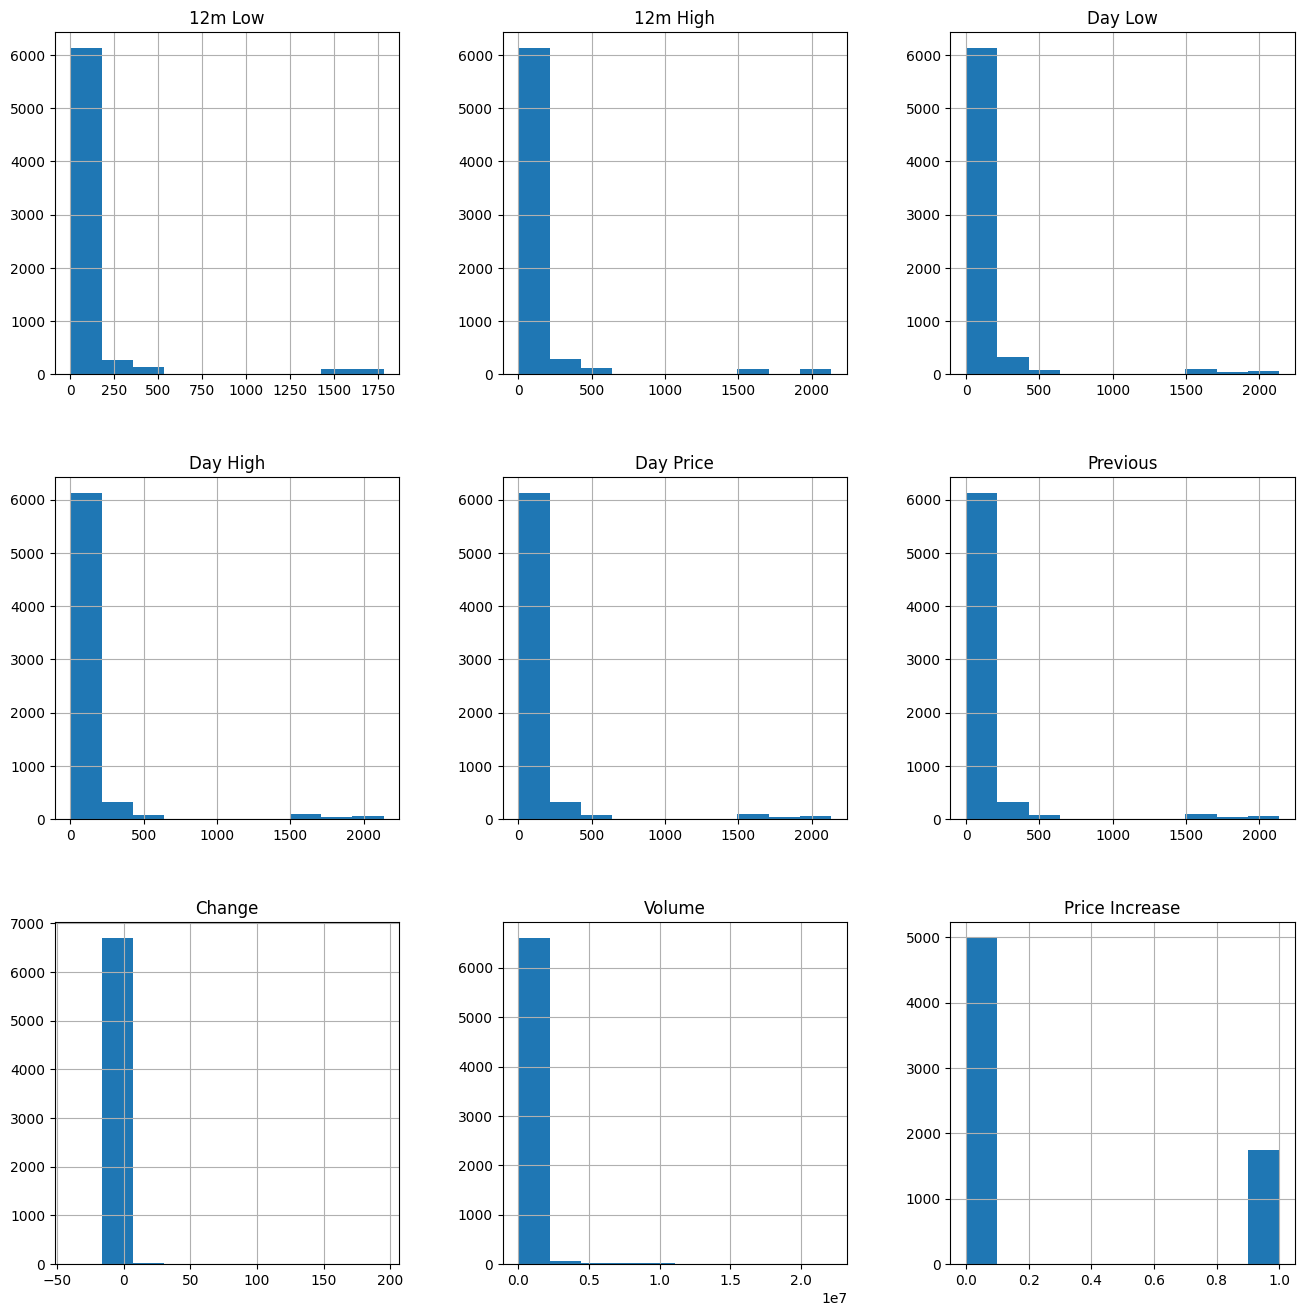

In [19]:
selected_data.hist(column=["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous", "Change", "Volume", "Price Increase"], figsize=(16, 16))
plt.show()

the shows that the varaibles contain some extrem outlaiers and the distrubtions are right skews.

# <h3> <font color="#A19104"> Plotting line plot for date and day proce in the dataset to identify overall trends : </font> </h3>

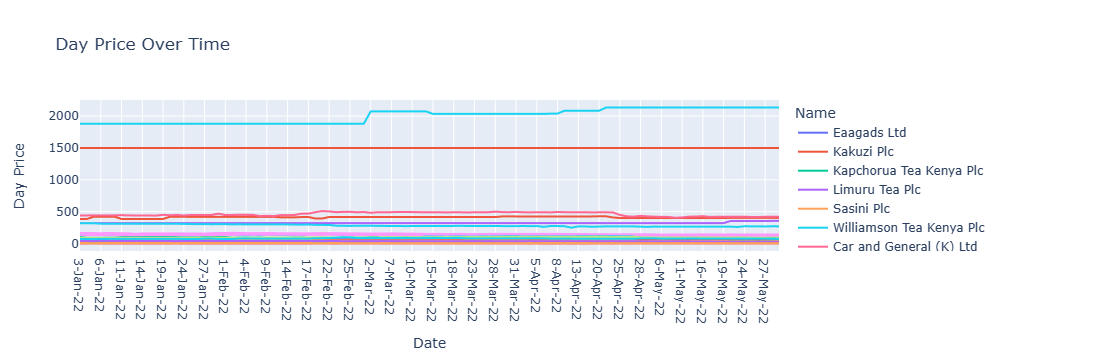

In [20]:
fig = px.line(selected_data, x="Date", y="Day Price", color="Name", title="Day Price Over Time")
fig.show()

The line plot reveals some interesting patterns in the data. First, we can see that there is a seasonal variation in the prices of the products, as they tend to increase in the summer months and decrease in the winter months. This could be related to the demand or supply of the products in different seasons.

Second, we can see that there is a difference in the price levels and trends among the companies. For example, Eaagad Ltd has the highest average price and shows a steady increase over time, while Uchumi Supermarket of  has the lowest average price and shows a slight decrease over time. This could be related to the quality or popularity of the products/services in the market.

Third, we can see that there are some outliers and fluctuations in the prices of some products\services. For example, some companies have seen a sharp drop in price in July or so, while some companies have seen a sudden spike in price in November. These outliers could be due to various factors, such as promotions, discounts, errors, or changes in demand or supply.


# <h3> <font color="#A19104"> Plotting scatter plot for previous and day proce in the dataset to identify overall trends : </font> </h3>

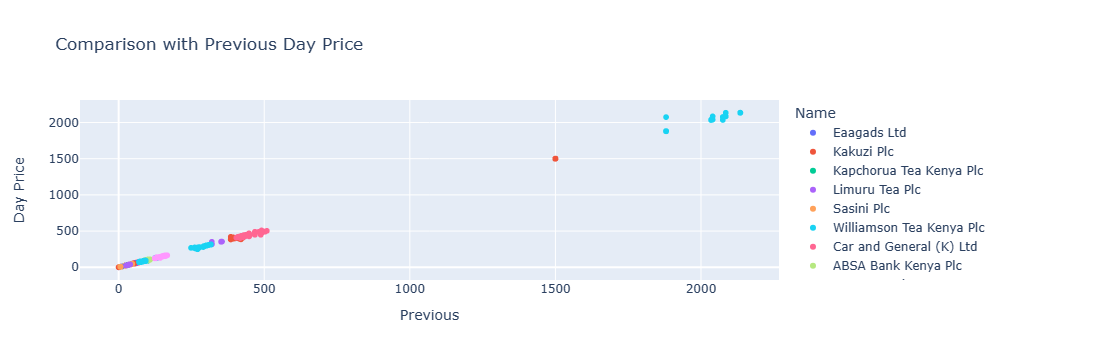

In [21]:
fig = px.scatter(selected_data, x="Previous", y="Day Price", color="Name", title="Comparison with Previous Day Price")
fig.show()

The scatter plot reveals some interesting patterns in the data. First, we can see that there is a strong positive linear association between the day price and the previous price, which means that products\services with higher previous prices tend to have higher day prices as well. This makes sense, as we would expect products\services with higher demand or quality to maintain their high prices over time.

Second, we can see that most of the data points are colored green, which means that most of the products\services have increased their prices from the previous day. This suggests that there is a general trend of inflation or rising demand in the market. However, some outliers are colored red, which means that they have decreased their prices from the previous day. These outliers could be due to various factors, such as promotions, discounts, errors, or changes in supply or demand.

Third, we can see that the color intensity varies across the data points, which means that the magnitude of the price increase also varies. Some products\services have a slight price increase, while others have a significant price increase. This could be related to the different types or categories of products\services, or their different levels of competition or popularity in the market.


# <h1> <font color="teal">Preprocessing : </font> </h1>

# <h3> <font color="#A19104">Changing the Date to datetime format and keeping it as index in the data set : </font> </h3>

In [15]:
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)

In [16]:
selected_data.drop(["Name"], axis=1, inplace=True)

In [17]:
selected_data

12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
Date                                                                            
2022-01-03    10.00     15.00    13.50     13.80      13.50     13.50   -0.01   
2022-01-03   355.00    427.00   385.00    385.00     385.00    385.00   -0.01   
2022-01-03    80.00    101.00    99.50     99.50      99.50     95.50    4.00   
2022-01-03   260.00    360.00   320.00    320.00     320.00    320.00   -0.01   
2022-01-03    16.75     22.60    18.70     18.70      18.70     18.70   -0.01   
...             ...       ...      ...       ...        ...       ...     ...   
2022-05-31     0.27      0.27     0.27      0.27       0.27      0.27   -0.01   
2022-05-31    26.10     36.40    29.00     29.00      29.00     30.00   -1.00   
2022-05-31    25.50     45.25    25.95     26.45      26.00     26.25   -0.25   
2022-05-31     5.00      7.48     5.50      5.60       5.56      5.58   -0.02   
2022-05-31  1780.00   2135.00  2135.00   2135.00    2135.00   2135.00   -0.01   

                Volume  Price Increase  
Date                                    
2022-01-03      4000.0               0  
2022-01-03     10800.0               0  
2022-01-03       100.0               1  
2022-01-03     10800.0               0  
2022-01-03     10800.0               0  
...                ...             ...  
2022-05-31     10800.0               0  
2022-05-31      2100.0               0  
2022-05-31  20079900.0               0  
2022-05-31     11700.0               0  
2022-05-31     10800.0               0  

[6732 rows x 9 columns]

# <h3> <font color="#A19104">Feature Engineering : </font> </h3>

# <h3> <font color="#A19104">Extract day of the week,month and year in the data set : </font> </h3>

In [18]:
selected_data['day_of_week'] = selected_data.index.dayofweek

selected_data['month'] = selected_data.index.month

selected_data['year'] = selected_data.index.year

# <h3> <font color="#A19104">Filling NA values with backward fill method : </font> </h3>

In [19]:
selected_data.fillna(method='bfill', inplace=True) 

In [20]:
selected_data

12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
Date                                                                            
2022-01-03    10.00     15.00    13.50     13.80      13.50     13.50   -0.01   
2022-01-03   355.00    427.00   385.00    385.00     385.00    385.00   -0.01   
2022-01-03    80.00    101.00    99.50     99.50      99.50     95.50    4.00   
2022-01-03   260.00    360.00   320.00    320.00     320.00    320.00   -0.01   
2022-01-03    16.75     22.60    18.70     18.70      18.70     18.70   -0.01   
...             ...       ...      ...       ...        ...       ...     ...   
2022-05-31     0.27      0.27     0.27      0.27       0.27      0.27   -0.01   
2022-05-31    26.10     36.40    29.00     29.00      29.00     30.00   -1.00   
2022-05-31    25.50     45.25    25.95     26.45      26.00     26.25   -0.25   
2022-05-31     5.00      7.48     5.50      5.60       5.56      5.58   -0.02   
2022-05-31  1780.00   2135.00  2135.00   2135.00    2135.00   2135.00   -0.01   

                Volume  Price Increase  day_of_week  month  year  
Date                                                              
2022-01-03      4000.0               0            0      1  2022  
2022-01-03     10800.0               0            0      1  2022  
2022-01-03       100.0               1            0      1  2022  
2022-01-03     10800.0               0            0      1  2022  
2022-01-03     10800.0               0            0      1  2022  
...                ...             ...          ...    ...   ...  
2022-05-31     10800.0               0            1      5  2022  
2022-05-31      2100.0               0            1      5  2022  
2022-05-31  20079900.0               0            1      5  2022  
2022-05-31     11700.0               0            1      5  2022  
2022-05-31     10800.0               0            1      5  2022  

[6732 rows x 12 columns]

# <h1> <font color="teal">EDA after Preprocessing : </font> </h1>

# <h3> <font color="#A19104"> Getting Data-types of the data set : </font> </h3>

In [29]:
selected_data.dtypes

12m Low           float64
12m High          float64
Day Low           float64
Day High          float64
Day Price         float64
Previous          float64
Change            float64
Volume            float64
Price Increase      int32
day_of_week         int32
month               int32
year                int32
dtype: object

# <h3> <font color="#A19104"> Printing the Shape of the data set : </font> </h3>

In [30]:
selected_data.shape

(6732, 12)

# <h3> <font color="#A19104"> Getting Description of the data set  : </font> </h3>

In [31]:
selected_data.describe()

12m Low     12m High      Day Low     Day High    Day Price  \
count  6732.000000  6732.000000  6732.000000  6732.000000  6732.000000   
mean     86.688598   105.925501    96.248228    96.686641    96.440997   
std     286.829071   324.290414   309.676291   309.764709   309.715686   
min       0.170000     0.270000     0.170000     0.180000     0.170000   
25%       3.400000     4.600000     3.830000     3.860000     3.830000   
50%       9.210000    13.650000    10.975000    11.000000    11.000000   
75%      33.000000    45.250000    37.000000    37.762500    37.462500   
max    1780.000000  2135.000000  2135.000000  2135.000000  2135.000000   

          Previous       Change        Volume  Price Increase  day_of_week  \
count  6732.000000  6732.000000  6.732000e+03     6732.000000  6732.000000   
mean     96.413639     0.022941  1.912565e+05        0.259507     1.980392   
std     309.482751     3.074186  1.097252e+06        0.438397     1.393227   
min       0.170000   -40.000000  1.000000e+02        0.000000     0.000000   
25%       3.830000    -0.030000  3.800000e+03        0.000000     1.000000   
50%      11.000000    -0.010000  1.080000e+04        0.000000     2.000000   
75%      37.462500     0.010000  2.682500e+04        1.000000     3.000000   
max    2135.000000   195.000000  2.214110e+07        1.000000     4.000000   

             month    year  
count  6732.000000  6732.0  
mean      2.960784  2022.0  
std       1.406822     0.0  
min       1.000000  2022.0  
25%       2.000000  2022.0  
50%       3.000000  2022.0  
75%       4.000000  2022.0  
max       5.000000  2022.0

# <h3> <font color="#A19104"> Checking Null-values of the data set : </font> </h3>

In [32]:
selected_data.isnull().sum()

12m Low           0
12m High          0
Day Low           0
Day High          0
Day Price         0
Previous          0
Change            0
Volume            0
Price Increase    0
day_of_week       0
month             0
year              0
dtype: int64

# <h3> <font color="#A19104"> Getting information about the data set : </font> </h3>

In [33]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6732 entries, 2022-01-03 to 2022-05-31
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   12m Low         6732 non-null   float64
 1   12m High        6732 non-null   float64
 2   Day Low         6732 non-null   float64
 3   Day High        6732 non-null   float64
 4   Day Price       6732 non-null   float64
 5   Previous        6732 non-null   float64
 6   Change          6732 non-null   float64
 7   Volume          6732 non-null   float64
 8   Price Increase  6732 non-null   int32  
 9   day_of_week     6732 non-null   int32  
 10  month           6732 non-null   int32  
 11  year            6732 non-null   int32  
dtypes: float64(8), int32(4)
memory usage: 578.5 KB


# <h3> <font color="#A19104"> Getting number of Unique values in the data set :  </font> </h3>

In [34]:
selected_data.nunique(axis=0)

12m Low            148
12m High            87
Day Low           1159
Day High          1111
Day Price         1356
Previous          1354
Change             266
Volume            1576
Price Increase       2
day_of_week          5
month                5
year                 1
dtype: int64

# <h3> <font color="#A19104"> Plotting box plot to find the distribution of stock prices by day of the week, month, and year : </font> </h3>

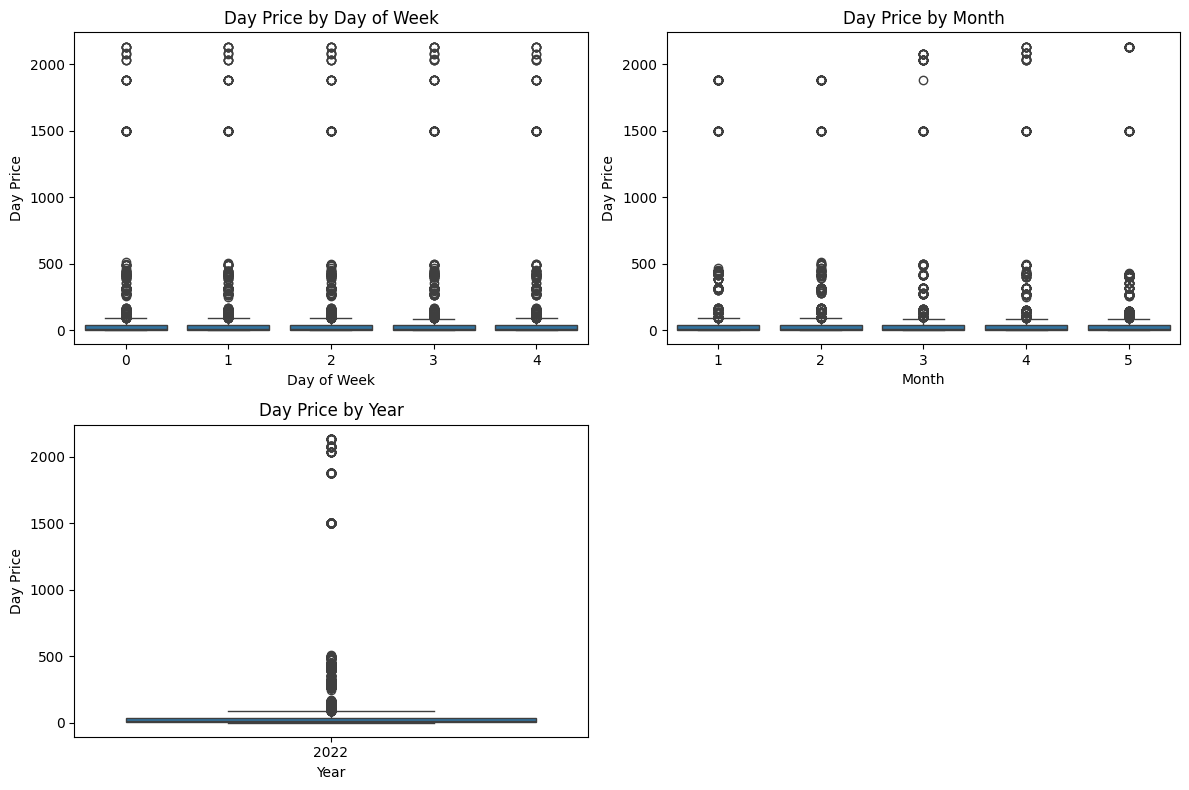

In [35]:
#Plot the distribution of the stock prices by day of the week, month, and year
plt.figure(figsize=(12, 8)) 
plt.subplot(2, 2, 1) 
sns.boxplot(x="day_of_week", y="Day Price", data=selected_data) 
plt.xlabel("Day of Week") 
plt.ylabel("Day Price") 
plt.title("Day Price by Day of Week") 
plt.subplot(2, 2, 2) 
sns.boxplot(x="month", y="Day Price", data=selected_data) 
plt.xlabel("Month") 
plt.ylabel("Day Price") 
plt.title("Day Price by Month") 
plt.subplot(2, 2, 3) 
sns.boxplot(x="year", y="Day Price", data=selected_data) 
plt.xlabel("Year") 
plt.ylabel("Day Price") 
plt.title("Day Price by Year") 
plt.tight_layout() 
plt.show()

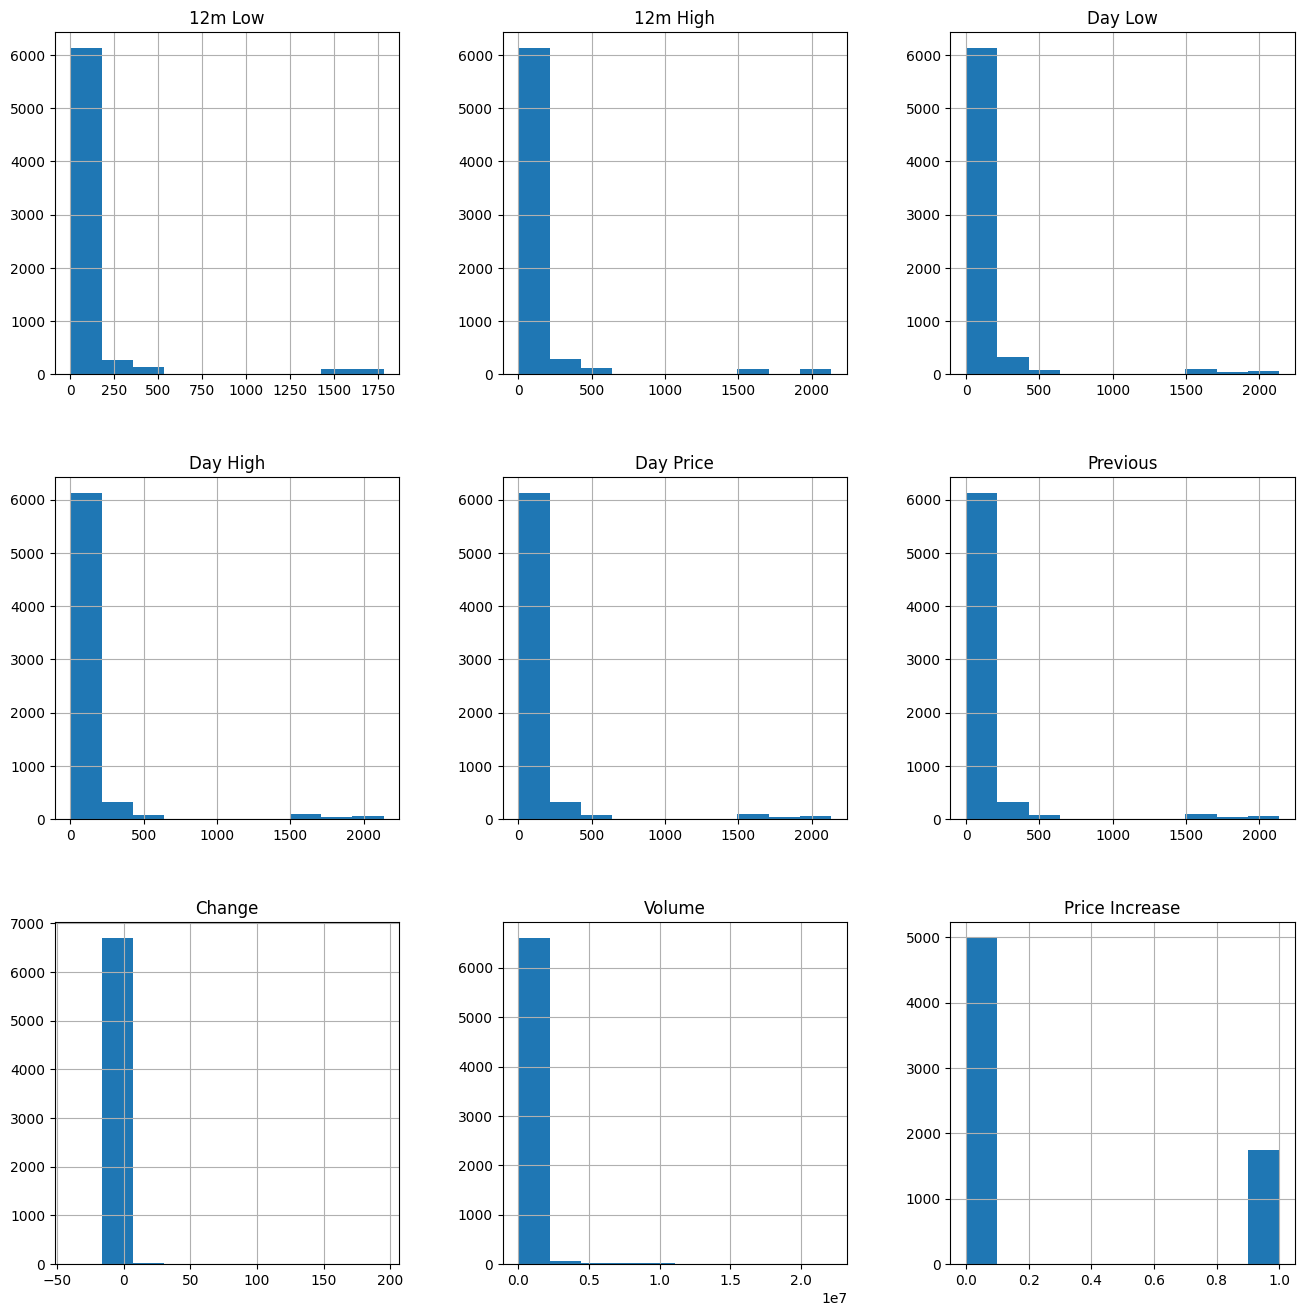

In [36]:
#Plot some histograms of the numerical variables
selected_data.hist(column=["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous", "Change", "Volume", "Price Increase"], figsize=(16, 16)) 
plt.show()

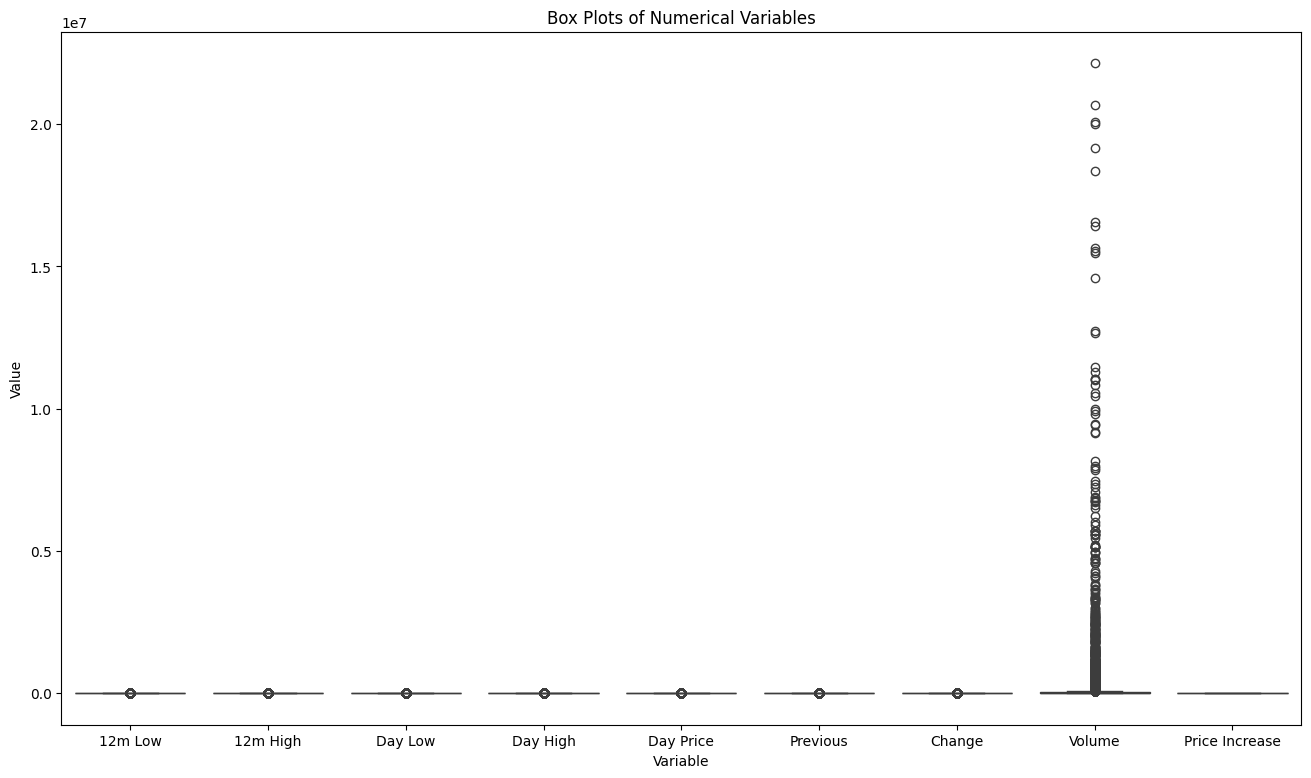

In [37]:
#Plot some box plots of the numerical variables
plt.figure(figsize=(16, 9)) 
sns.boxplot(data=selected_data[["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous", "Change", "Volume", "Price Increase"]]) 
plt.xlabel("Variable") 
plt.ylabel("Value") 
plt.title("Box Plots of Numerical Variables") 
plt.show()

In [ ]:
#Plot some scatter plots of the numerical variables
plt.figure(figsize=(16, 9)) 
sns.pairplot(data=selected_data[["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous", "Change", "Volume", "Price Increase"]]) 
plt.show()


In [ ]:
#Plot some line plots of the numerical variables by company
fig = px.line(selected_data, x="Date", y=["12m Low", "12m High", "Day Low", "Day High", "Day Price", "Previous", "Change", "Volume", "Price Increase"], facet_col="Name", facet_col_wrap=3) 
fig.show()

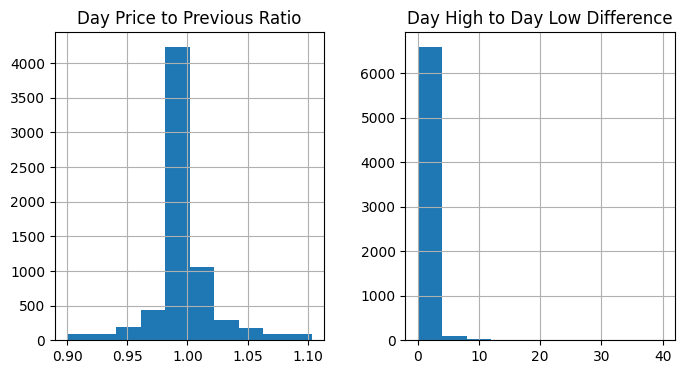

In [38]:
#Create some new features from the existing variables
selected_data["Day Price to Previous Ratio"] = selected_data["Day Price"] / selected_data["Previous"] 
selected_data["Day High to Day Low Difference"] = selected_data["Day High"] - selected_data["Day Low"]

#Plot some histograms of the new features
selected_data.hist(column=["Day Price to Previous Ratio", "Day High to Day Low Difference"], figsize=(8, 4)) 
plt.show()

In [ ]:
#Plot some scatter plots of the new features by company
plt.figure(figsize=(16, 9)) 
plt.subplot(2, 2, 1) 
sns.scatterplot(x="Day Price to Previous Ratio", y="Day Price", hue="Name", data=selected_data) 
plt.xlabel("Day Price to Previous Ratio") 
plt.ylabel("Day Price") 
plt.title("Day Price vs Day Price to Previous Ratio by Company") 
plt.subplot(2, 2, 2) 
sns.scatterplot(x="Day High to Day Low Difference", y="Day Price", hue="Name", data=selected_data) 
plt.xlabel("Day High to Day Low Difference") 
plt.ylabel("Day Price") 
plt.title("Day Price vs Day High to Day Low Difference by Company") 
plt.tight_layout() 
plt.show()

# <h3> <font color="#A19104"> Plotting Distribution plot to find the distribution of day price and price increase in the dataset : </font> </h3>

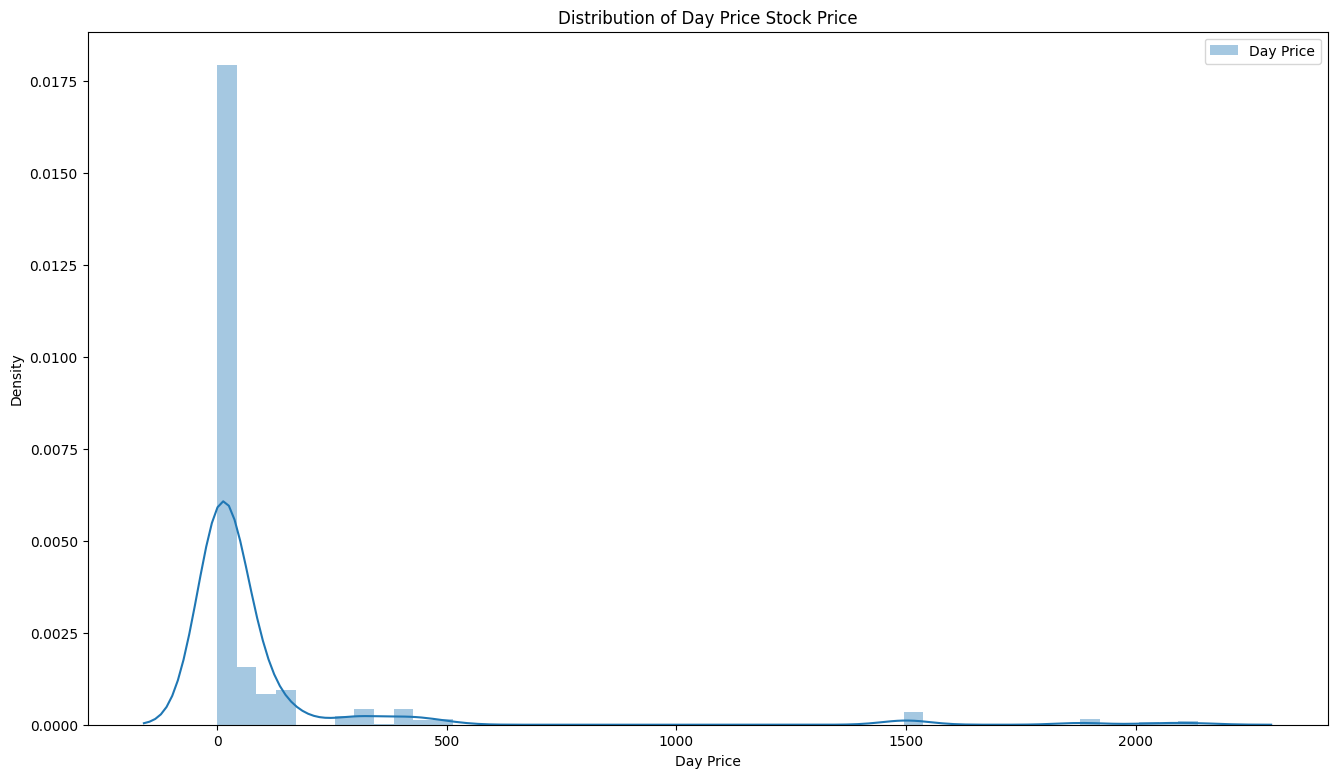

In [40]:
plt.figure(figsize=(16, 9))
sns.distplot(selected_data['Day Price'], label='Day Price')
plt.title('Distribution of Day Price Stock Price')
plt.legend()
plt.show()

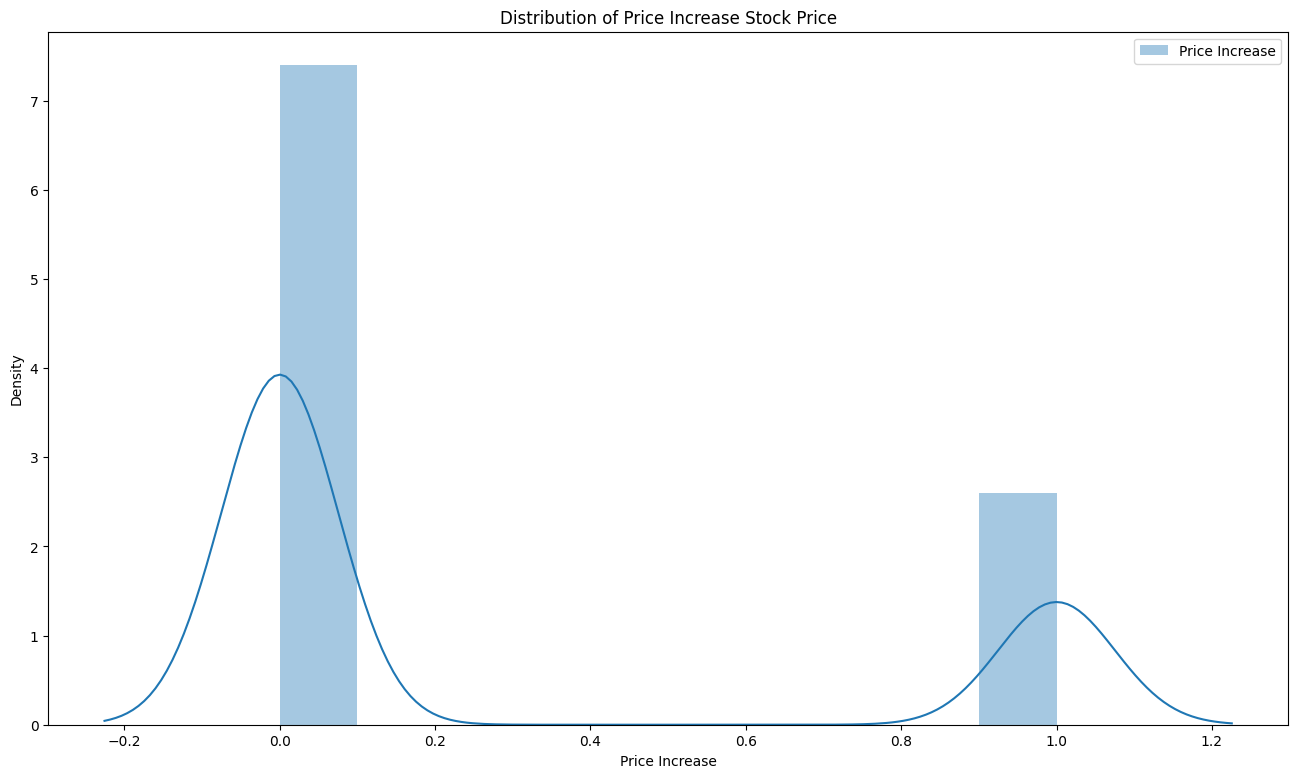

In [41]:
plt.figure(figsize=(16, 9))
sns.distplot(selected_data['Price Increase'], label='Price Increase')
plt.title('Distribution of Price Increase Stock Price')
plt.legend()
plt.show()

In [42]:
selected_data.head()

12m Low  12m High  Day Low  Day High  Day Price  Previous  Change  \
Date                                                                            
2022-01-03    10.00      15.0     13.5      13.8       13.5      13.5   -0.01   
2022-01-03   355.00     427.0    385.0     385.0      385.0     385.0   -0.01   
2022-01-03    80.00     101.0     99.5      99.5       99.5      95.5    4.00   
2022-01-03   260.00     360.0    320.0     320.0      320.0     320.0   -0.01   
2022-01-03    16.75      22.6     18.7      18.7       18.7      18.7   -0.01   

             Volume  Price Increase  day_of_week  month  year  \
Date                                                            
2022-01-03   4000.0               0            0      1  2022   
2022-01-03  10800.0               0            0      1  2022   
2022-01-03    100.0               1            0      1  2022   
2022-01-03  10800.0               0            0      1  2022   
2022-01-03  10800.0               0            0      1  2022   

            Day Price to Previous Ratio  Day High to Day Low Difference  
Date                                                                     
2022-01-03                     1.000000                             0.3  
2022-01-03                     1.000000                             0.0  
2022-01-03                     1.041885                             0.0  
2022-01-03                     1.000000                             0.0  
2022-01-03                     1.000000                             0.0

# <h3> <font color="#A19104"> Plotting Correlation plot to find the correlation of attributes : </font> </h3>

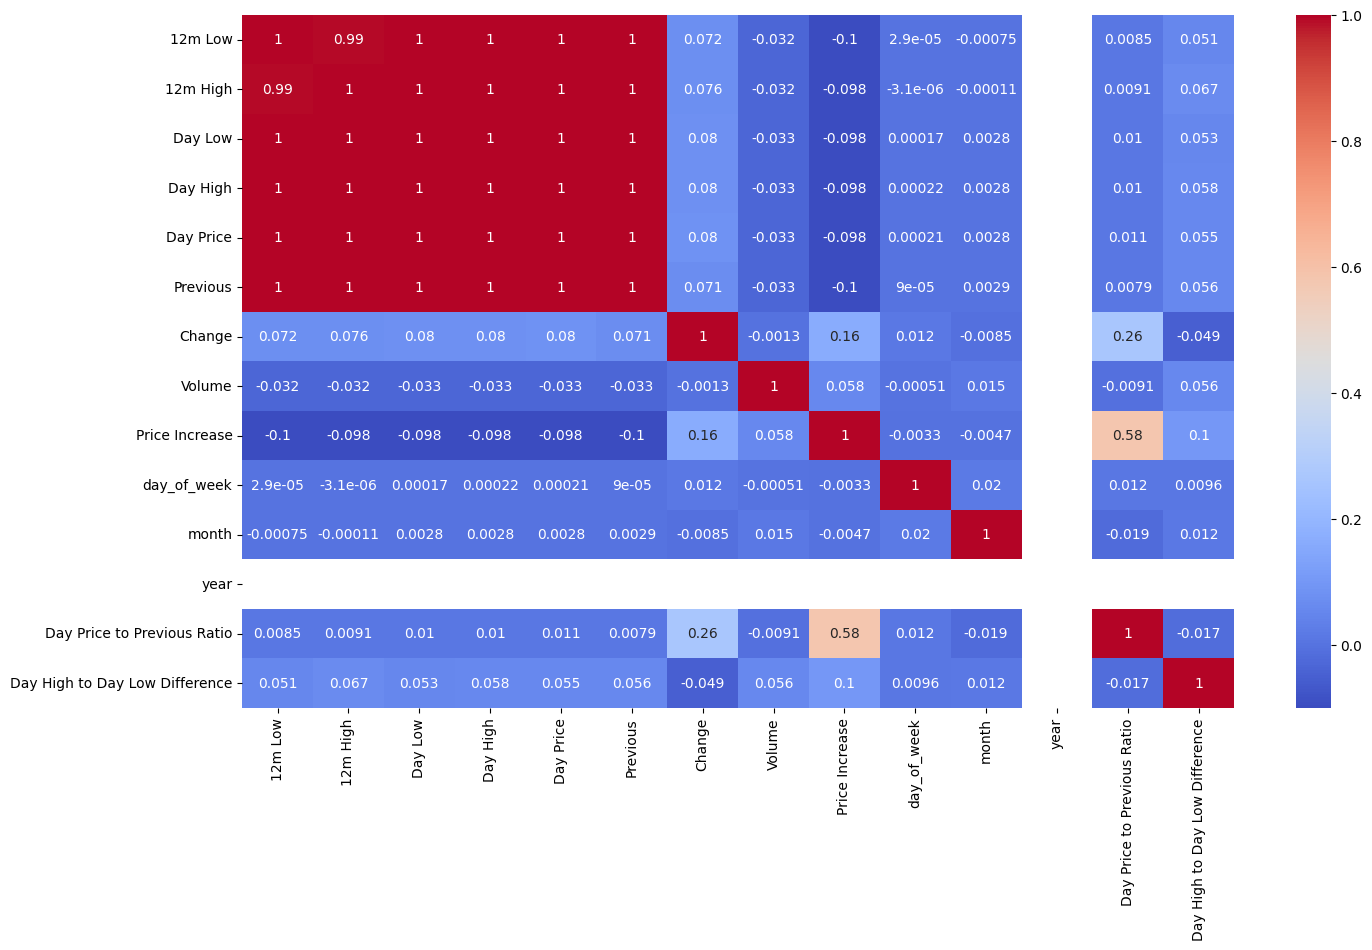

In [43]:
plt.figure(figsize=(16,9))
correlation = selected_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# <h1> <font color="teal">Model Building: </font> </h1>

# <h3> <font color="#A19104"> Splitting the dataset into train and test set : </font> </h3>

In [45]:
X = selected_data.drop(['Price Increase'], axis=1)
y = selected_data['Price Increase']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# <h3> <font color="#A19104">Scaling the data : </font> </h3>

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <h2> <font color="#A19104">Decision Tree Classifier : </font> </h2>

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=20000, min_samples_leaf=3, min_samples_split=11)

dt_classifier.fit(X_train_scaled, y_train)

dt_predictions = dt_classifier.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_predictions)


# <h3> <font color="#A19104">Evaluation metrics of Decision Tree Classifier : </font> </h3>

In [48]:
print("Decision Trees:")
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print("\nAccuracy:", dt_accuracy)
print("\nPrecision:", dt_precision)
print("\nRecall:", dt_recall)
print("\nF1-score:", dt_f1)

Decision Trees:

Accuracy: 0.9977728285077951

Precision: 1.0

Recall: 0.9907407407407407

F1-score: 0.9953488372093023


In [49]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1023
           1       1.00      0.99      1.00       324

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



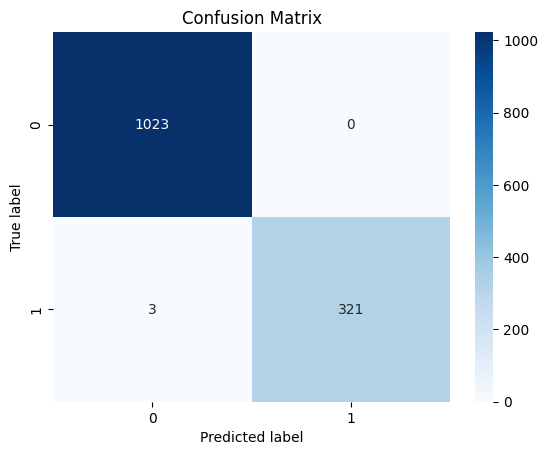

In [50]:
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

class_labels = np.unique(y_test)

sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

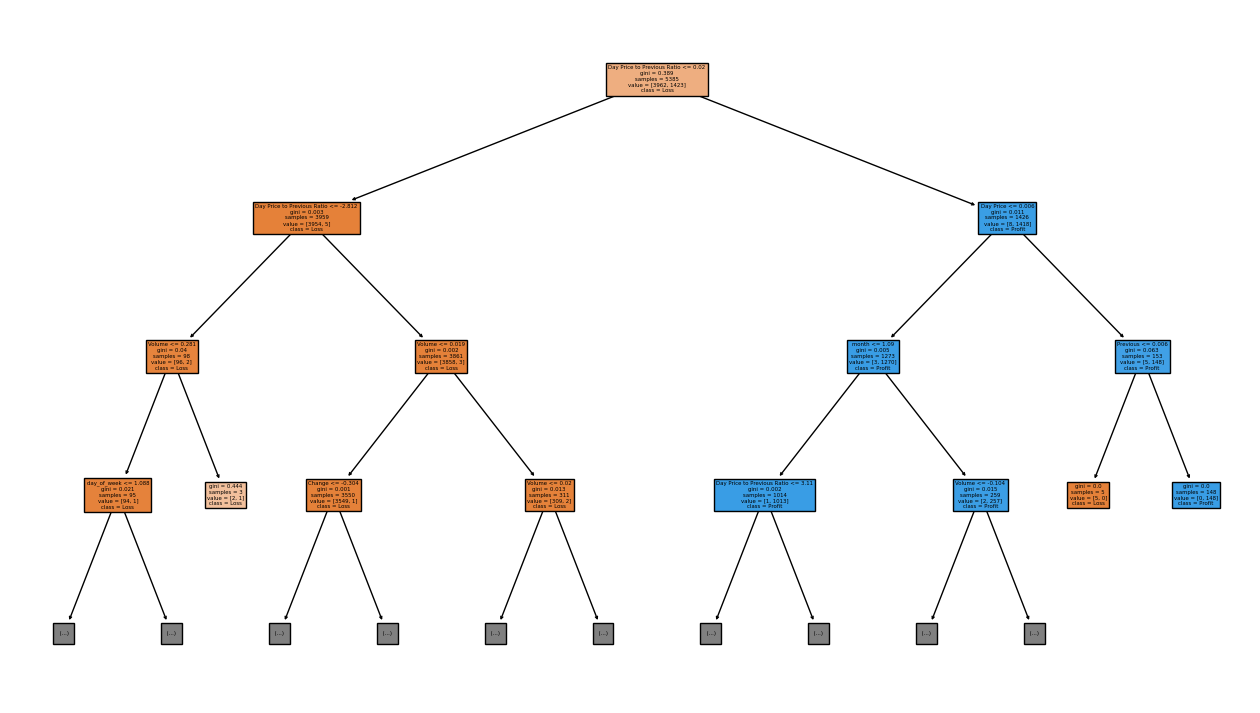

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 9))
plot_tree(dt_classifier, filled=True, max_depth=3, feature_names=X.columns, class_names=['Loss', 'Profit'])
plt.show()


In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

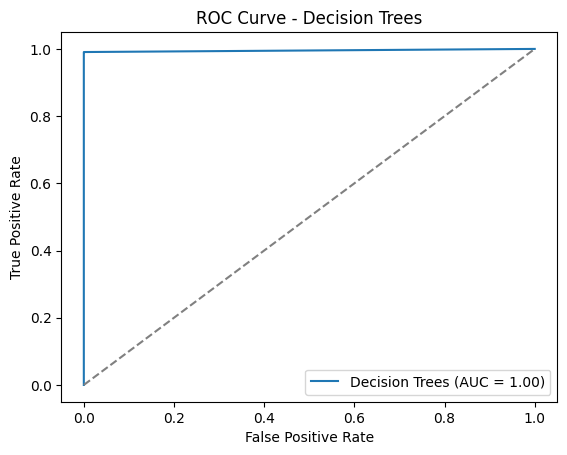

In [53]:
dt_probs = dt_classifier.predict_proba(X_test_scaled)[:, 1]
d1_dt_fpr, d1_dt_tpr, _ = roc_curve(y_test, dt_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

plt.plot(d1_dt_fpr, d1_dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Trees')
plt.legend() 
plt.show()


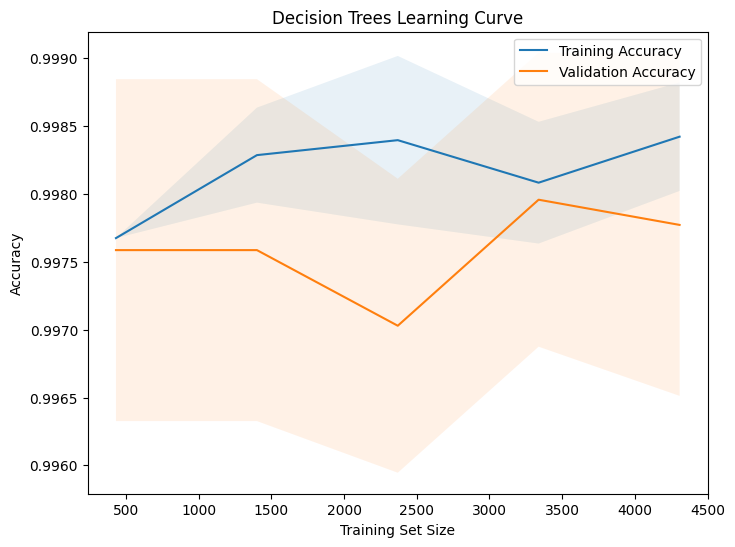

In [54]:
from sklearn.model_selection import learning_curve
import numpy as np

dt_train_sizes, dt_train_scores, dt_val_scores = learning_curve(dt_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
dt_train_mean = np.mean(dt_train_scores, axis=1)
dt_train_std = np.std(dt_train_scores, axis=1)
dt_val_mean = np.mean(dt_val_scores, axis=1)
dt_val_std = np.std(dt_val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(dt_train_sizes, dt_train_mean, label='Training Accuracy')
plt.fill_between(dt_train_sizes, dt_train_mean - dt_train_std, dt_train_mean + dt_train_std, alpha=0.1)
plt.plot(dt_train_sizes, dt_val_mean, label='Validation Accuracy')
plt.fill_between(dt_train_sizes, dt_val_mean - dt_val_std, dt_val_mean + dt_val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Decision Trees Learning Curve')
plt.legend()
plt.show()

# <h3> <font color="#A19104"> Creating a new dataframe for collecting the metric values to compare the models : </font> </h3>

In [55]:
comparision = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score','AUC'])

In [56]:
comparision.loc[0] = ['D1_Decision_Trees', dt_accuracy, dt_precision, dt_recall, dt_f1,dt_auc]

In [57]:
comparision

Model  Accuracy  Precision    Recall  F1-score       AUC
0  D1_Decision_Trees  0.997773        1.0  0.990741  0.995349  0.995361

# <h2> <font color="#A19104">SVC : </font> </h2>

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf']  
}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.9916434540389971


In [59]:
from sklearn.svm import SVC

svm_classifier = SVC(C=10,gamma=0.1,kernel='linear')

svm_classifier.fit(X_train_scaled, y_train)

svm_predictions = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, svm_predictions)

# <h3> <font color="#A19104">Evaluation metrics of Support Vector Machines : </font> </h3>

In [60]:
print("Support Vector Machines:")
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("\nAccuracy:", svm_accuracy)
print("\nPrecision:", svm_precision)
print("\nRecall:", svm_recall)
print("\nF1-score:", svm_f1)


Support Vector Machines:

Accuracy: 0.991833704528582

Precision: 1.0

Recall: 0.9660493827160493

F1-score: 0.9827315541601255


In [61]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1023
           1       1.00      0.97      0.98       324

    accuracy                           0.99      1347
   macro avg       0.99      0.98      0.99      1347
weighted avg       0.99      0.99      0.99      1347



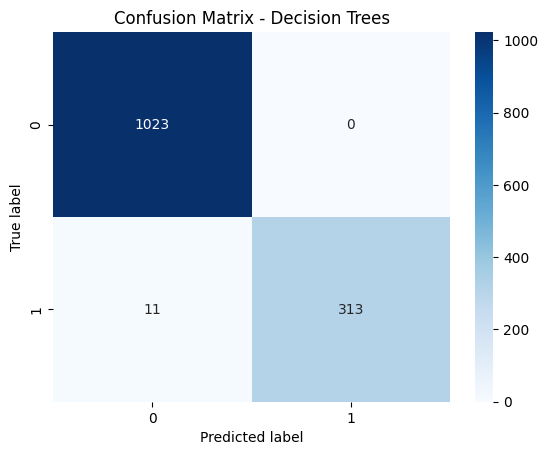

In [62]:
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

class_labels = np.unique(y_test)

sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix - Decision Trees")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

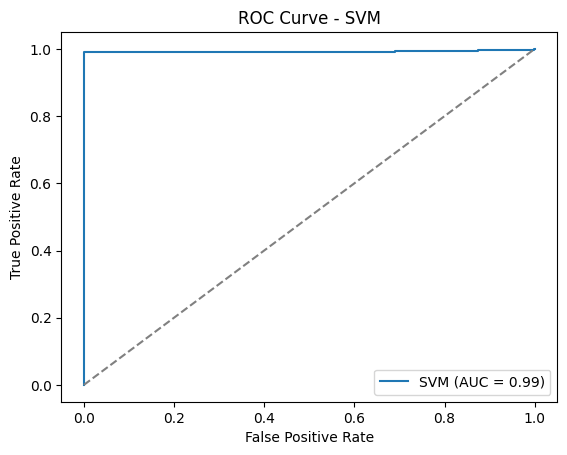

In [63]:
svm_probs = svm_classifier.decision_function(X_test_scaled)

d1_svm_fpr, d1_svm_tpr, thresholds = roc_curve(y_test, svm_probs)

svm_auc_score = roc_auc_score(y_test, svm_probs)

plt.plot(d1_svm_fpr, d1_svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

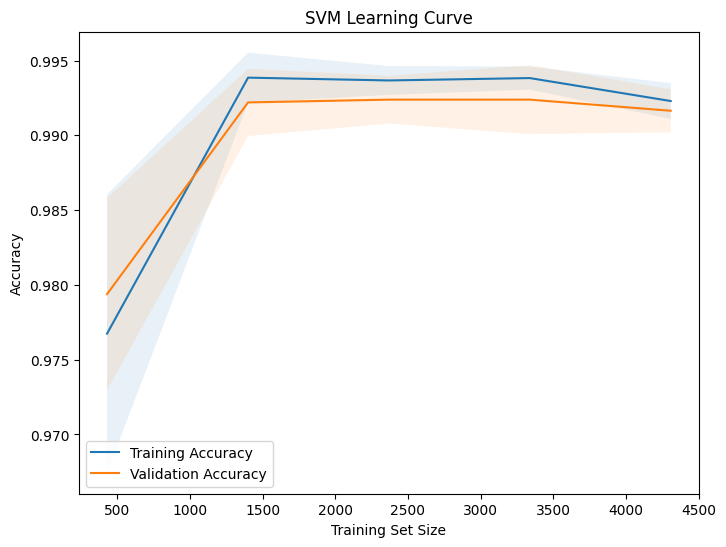

In [64]:
svm_train_sizes, svm_train_scores, svm_val_scores = learning_curve(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
svm_train_mean = np.mean(svm_train_scores, axis=1)
svm_train_std = np.std(svm_train_scores, axis=1)
svm_val_mean = np.mean(svm_val_scores, axis=1)
svm_val_std = np.std(svm_val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(svm_train_sizes, svm_train_mean, label='Training Accuracy')
plt.fill_between(svm_train_sizes, svm_train_mean - svm_train_std, svm_train_mean + svm_train_std, alpha=0.1)
plt.plot(svm_train_sizes, svm_val_mean, label='Validation Accuracy')
plt.fill_between(svm_train_sizes, svm_val_mean - svm_val_std, svm_val_mean + svm_val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('SVM Learning Curve')
plt.legend()
plt.show()

In [65]:
comparision.loc[1] = ['D1_SVM', svm_accuracy, svm_precision, svm_recall, svm_f1,svm_auc_score]


In [66]:
comparision

Model  Accuracy  Precision    Recall  F1-score       AUC
0  D1_Decision_Trees  0.997773        1.0  0.990741  0.995349  0.995361
1             D1_SVM  0.991834        1.0  0.966049  0.982732  0.992089

# <h2> <font color="#A19104">Gaussian Naive Bayes : </font> </h2>

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7] 
}

grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'var_smoothing': 1e-09}
Best Score: 0.3478180129990715


In [68]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(var_smoothing=1e-09)

nb_classifier.fit(X_train_scaled, y_train)

nb_predictions = nb_classifier.predict(X_test_scaled)

nb_accuracy = accuracy_score(y_test, nb_predictions)

# <h3> <font color="#A19104">Evaluation metrics of Gaussian Naive Bayes : </font> </h3>

In [69]:
print("Naive Bayes:")
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)


print("\nAccuracy:", nb_accuracy)
print("\nPrecision:", nb_precision)
print("\nRecall:", nb_recall)
print("\nF1-score:", nb_f1)


Naive Bayes:

Accuracy: 0.303637713437268

Precision: 0.2536115569823435

Recall: 0.9753086419753086

F1-score: 0.40254777070063696


In [70]:
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

           0       0.92      0.09      0.17      1023
           1       0.25      0.98      0.40       324

    accuracy                           0.30      1347
   macro avg       0.59      0.53      0.28      1347
weighted avg       0.76      0.30      0.22      1347



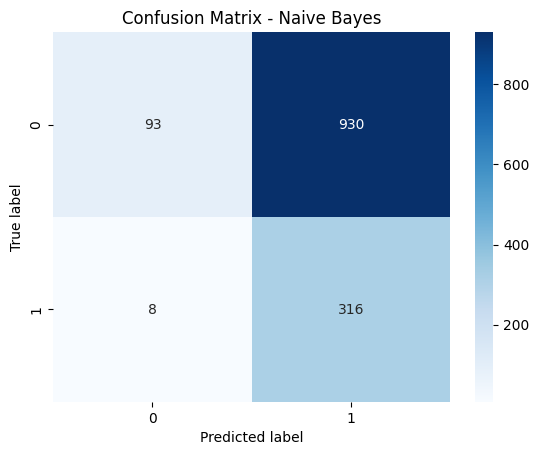

In [71]:
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)

class_labels = np.unique(y_test)

sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

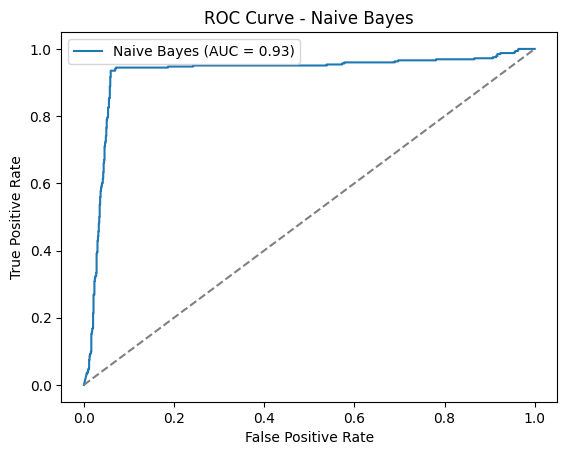

In [72]:
nb_probs = nb_classifier.predict_proba(X_test_scaled)[:, 1]

d1_nb_fpr, d1_nb_tpr, thresholds = roc_curve(y_test, nb_probs)

nb_auc_score = roc_auc_score(y_test, nb_probs)

plt.plot(d1_nb_fpr, d1_nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()

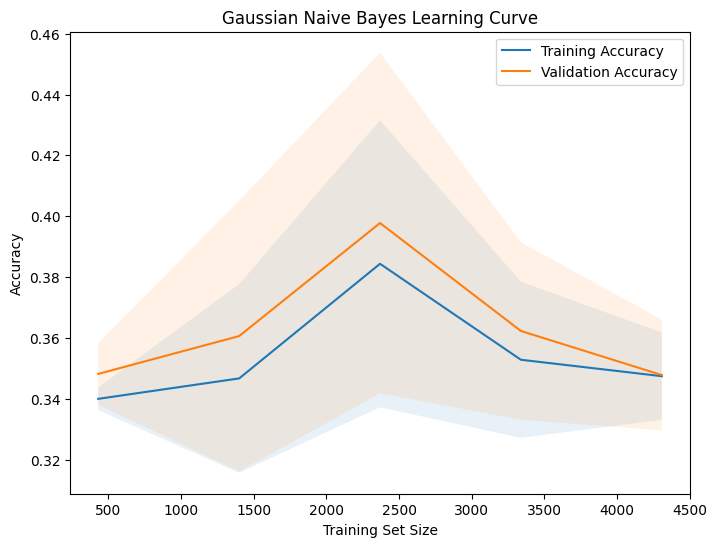

In [73]:
nb_train_sizes, nb_train_scores, nb_val_scores = learning_curve(nb_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')
nb_train_mean = np.mean(nb_train_scores, axis=1)
nb_train_std = np.std(nb_train_scores, axis=1)
nb_val_mean = np.mean(nb_val_scores, axis=1)
nb_val_std = np.std(nb_val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(nb_train_sizes, nb_train_mean, label='Training Accuracy')
plt.fill_between(nb_train_sizes, nb_train_mean - nb_train_std, nb_train_mean + nb_train_std, alpha=0.1)
plt.plot(nb_train_sizes, nb_val_mean, label='Validation Accuracy')
plt.fill_between(nb_train_sizes, nb_val_mean - nb_val_std, nb_val_mean + nb_val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes Learning Curve')
plt.legend()
plt.show()

In [74]:
comparision.loc[2] = ['D1_Naive_Bayes', nb_accuracy, nb_precision, nb_recall, nb_f1, nb_auc_score]

In [75]:
comparision

Model  Accuracy  Precision    Recall  F1-score       AUC
0  D1_Decision_Trees  0.997773   1.000000  0.990741  0.995349  0.995361
1             D1_SVM  0.991834   1.000000  0.966049  0.982732  0.992089
2     D1_Naive_Bayes  0.303638   0.253612  0.975309  0.402548  0.925866

# <h2> <font color="#A19104">KNN : </font> </h2>

In [76]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

param_grid = { 'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ["euclidean", "manhattan"] }

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_ 
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.95338904363974


In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

knn_classifier.fit(X_train_scaled, y_train)

knn_predictions = knn_classifier.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, knn_predictions)


# <h3> <font color="#A19104">Evaluation metrics of KNN : </font> </h3>

In [78]:
print("KNN:")
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)


print("\nAccuracy:", knn_accuracy)
print("\nPrecision:", knn_precision)
print("\nRecall:", knn_recall)
print("\nF1-score:", knn_f1)



KNN:

Accuracy: 0.9517446176688938

Precision: 0.9675090252707581

Recall: 0.8271604938271605

F1-score: 0.891846921797005


In [79]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1023
           1       0.97      0.83      0.89       324

    accuracy                           0.95      1347
   macro avg       0.96      0.91      0.93      1347
weighted avg       0.95      0.95      0.95      1347



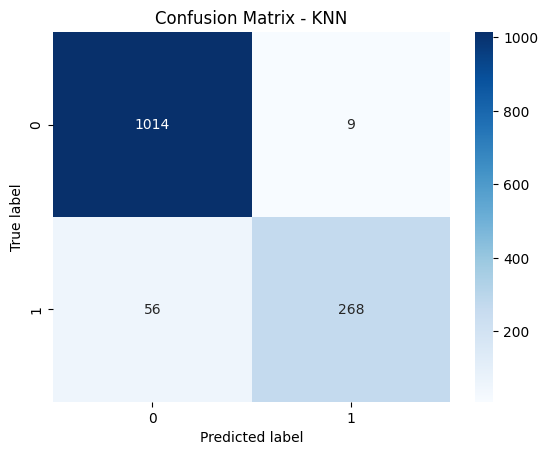

In [80]:
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

class_labels = np.unique(y_test)

sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_labels, yticklabels=class_labels)

plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

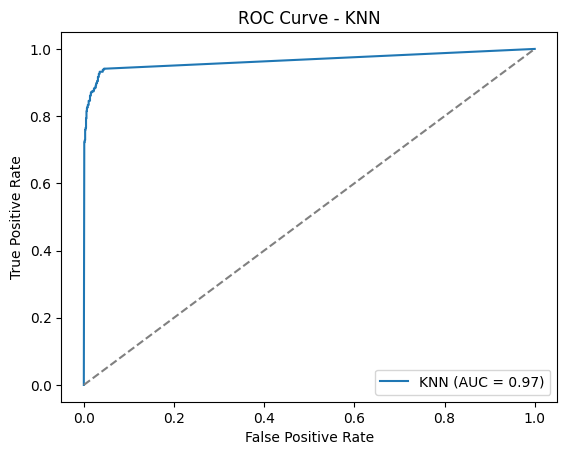

In [81]:
knn_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]

d1_nb_fpr, d1_nb_tpr, thresholds = roc_curve(y_test, knn_probs)

knn_auc_score = roc_auc_score(y_test, knn_probs)

plt.plot(d1_nb_fpr, d1_nb_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

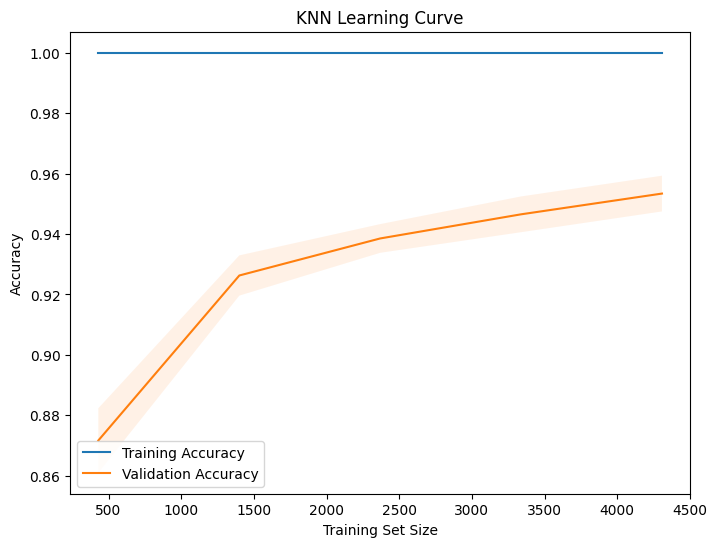

In [82]:
knn_train_sizes, knn_train_scores, knn_val_scores = learning_curve(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy') 
knn_train_mean = np.mean(knn_train_scores, axis=1) 
knn_train_std = np.std(knn_train_scores, axis=1) 
knn_val_mean = np.mean(knn_val_scores, axis=1) 
knn_val_std = np.std(knn_val_scores, axis=1)

plt.figure(figsize=(8, 6)) 
plt.plot(knn_train_sizes, knn_train_mean, label='Training Accuracy') 
plt.fill_between(knn_train_sizes, knn_train_mean - knn_train_std, knn_train_mean + knn_train_std, alpha=0.1) 
plt.plot(knn_train_sizes, knn_val_mean, label='Validation Accuracy') 
plt.fill_between(knn_train_sizes, knn_val_mean - knn_val_std, knn_val_mean + knn_val_std, alpha=0.1) 
plt.xlabel('Training Set Size') 
plt.ylabel('Accuracy') 
plt.title('KNN Learning Curve') 
plt.legend() 
plt.show()

In [83]:
comparision.loc[3] = ['D1_KNN', knn_accuracy, knn_precision, knn_recall, knn_f1, knn_auc_score]

In [84]:
comparision

Model  Accuracy  Precision    Recall  F1-score       AUC
0  D1_Decision_Trees  0.997773   1.000000  0.990741  0.995349  0.995361
1             D1_SVM  0.991834   1.000000  0.966049  0.982732  0.992089
2     D1_Naive_Bayes  0.303638   0.253612  0.975309  0.402548  0.925866
3             D1_KNN  0.951745   0.967509  0.827160  0.891847  0.965669

# <h1> <font color="teal">Comaprision of Models: </font> </h1>

# <h3> <font color="#A19104">using cross-validation scores : </font> </h3>

In [85]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [
    ('Decision Trees', dt_classifier),
    ('SVM', svm_classifier),
    ('Naive Bayes', nb_classifier),
    ('KNN', knn_classifier)
]

cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

cv_scores_df = pd.DataFrame(cv_scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
cv_scores_df['Model'] = [name for name, _ in models]

cv_scores_df['Average'] = cv_scores_df.iloc[:, :-1].mean(axis=1)

print(cv_scores_df)


     Fold 1    Fold 2    Fold 3    Fold 4    Fold 5           Model   Average
0  0.999071  0.999071  0.996286  0.997214  0.996286  Decision Trees  0.997586
1  0.992572  0.991643  0.992572  0.992572  0.988858             SVM  0.991643
2  0.347261  0.330548  0.341690  0.382544  0.337047     Naive Bayes  0.347818
3  0.948932  0.945218  0.953575  0.957289  0.961931             KNN  0.953389


# <h3> <font color="#A19104">Plot box plots of the cross-validation scores : </font> </h3>

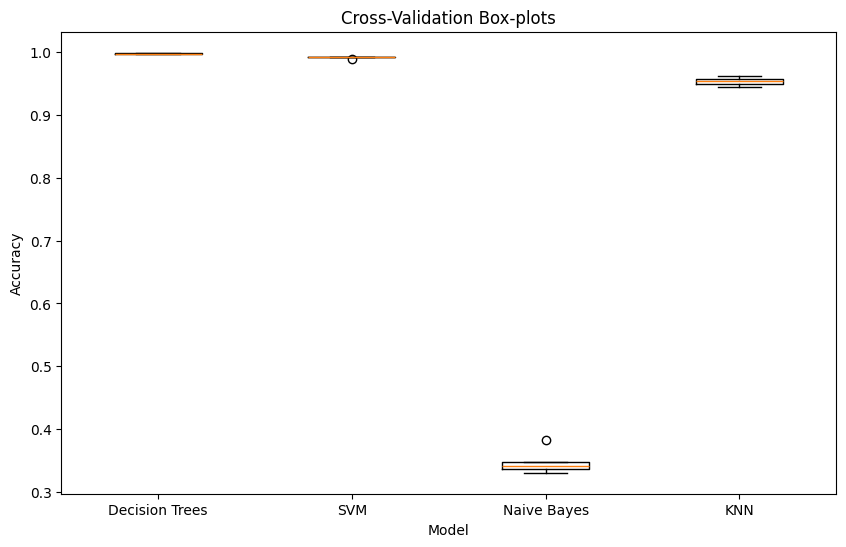

In [86]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=[name for name, _ in models])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Box-plots')
plt.show()

# <h3> <font color="#A19104">Plotting bar plot to compare the metric values of each model : </font> </h3>

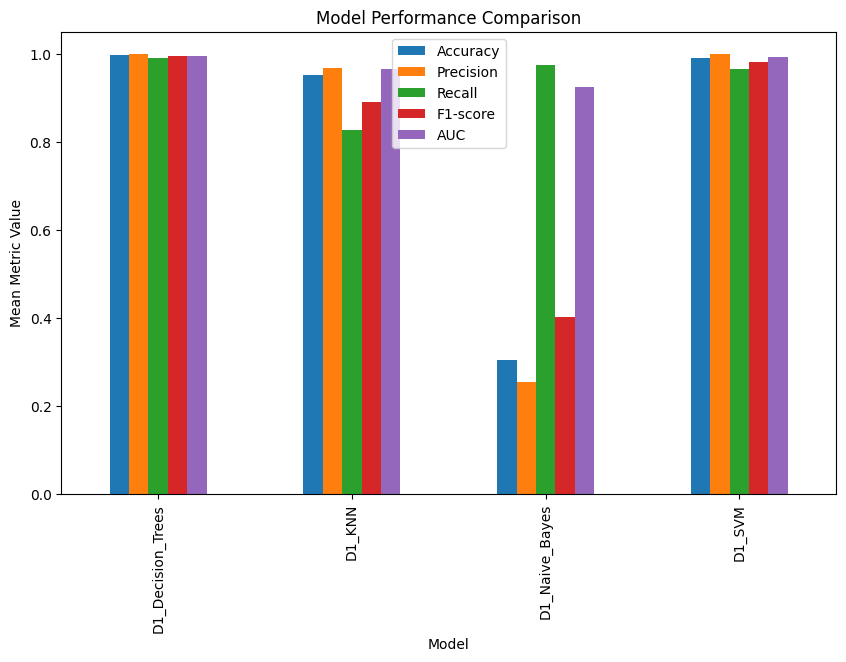

In [87]:
mean_metrics = comparision.groupby('Model').mean()

mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Metric Value')
plt.show()

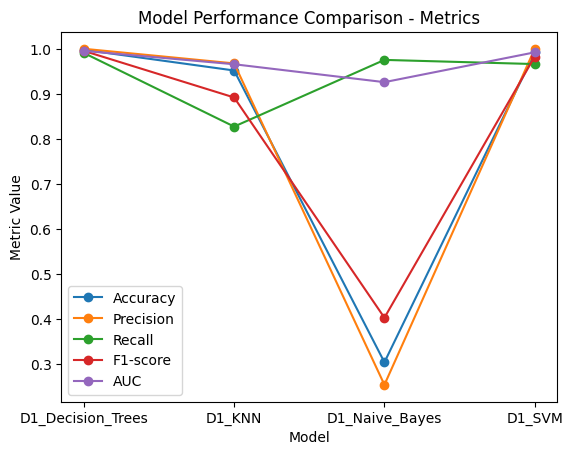

In [88]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
for metric in metric_names:
    plt.plot(mean_metrics.index, mean_metrics[metric], marker='o', label=metric)

plt.title('Model Performance Comparison - Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

# <h3> <font color="#A19104">Plotting ROC of all models : </font> </h3>

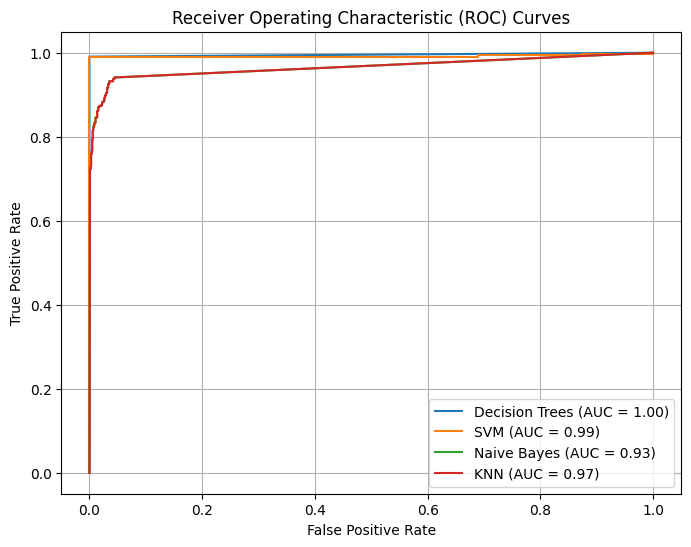

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(d1_dt_fpr, d1_dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))

plt.plot(d1_svm_fpr, d1_svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc_score))

plt.plot(d1_nb_fpr, d1_nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc_score))

plt.plot(d1_nb_fpr, d1_nb_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc_score))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()